In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as pl
import rate_model as rm
import ipywidgets as ipw
from rate_model.params import *
from tqdm import tqdm_notebook

In [2]:
# with population spikes (ps)
params_tsodyks_ps = params_tsodyks.copy()
params_tsodyks_ps.update({'J0': -12., 'I0': 5.0})

In [3]:
# without population spikes (nops)
params_tsodyks_nops = params_tsodyks.copy()
params_tsodyks_nops.update({'J0': -18., 'I0': 7.0})

In [4]:
params = params_nops.copy()
stim = stim_nops.copy()

In [5]:
params = params_ps.copy()
stim = stim_ps.copy()

In [6]:
params = params_tsodyks_nops.copy()
stim = stim_tsodyks.copy()

In [7]:
sim_params = {
    'sim_time': 175.,
    'dt': 0.001,
    'sampl_dt': 0.01,
    'N': 90
}

In [8]:
noise_params = {
    'D': .5,
    'tau_n': 0.1,
    'seed': 0
}

In [9]:
num_samples = 32

In [10]:
def calc_diffusion(params, stim, noise_params, num_samples):
    rate_network = rm.RateNetwork.init_all_params(**params)

    u_traces = np.zeros((num_samples, len(rate_network.tm) - 2))
    rate_traces = np.zeros((num_samples, len(rate_network.tm) - 2))
    
    for i in tqdm_notebook(range(num_samples)):
#         params.update({'seed': i, 'eps': 0.5})
#         rate_network = rm.RateNetwork.init_all_params(**params)

        rate_network.set_initial_values()
        rate_network.set_stimuli(**stim)
        
        noise_params.update({'seed': i})
        rate_network.set_noise_params(**noise_params)
        
        rate_network.simulate_facil(backend = 'c')
        u_traces[i] = np.degrees(rate_network.get_angle(rate_network.ActU))[2:]
        rate_traces[i] = np.degrees(rate_network.get_angle(rate_network.ActRE))[2:]
    return rate_network.tm[2:], u_traces, rate_traces

In [11]:
params.update(sim_params)
tm, u_traces, rate_traces = calc_diffusion(params, stim, noise_params, num_samples=num_samples)

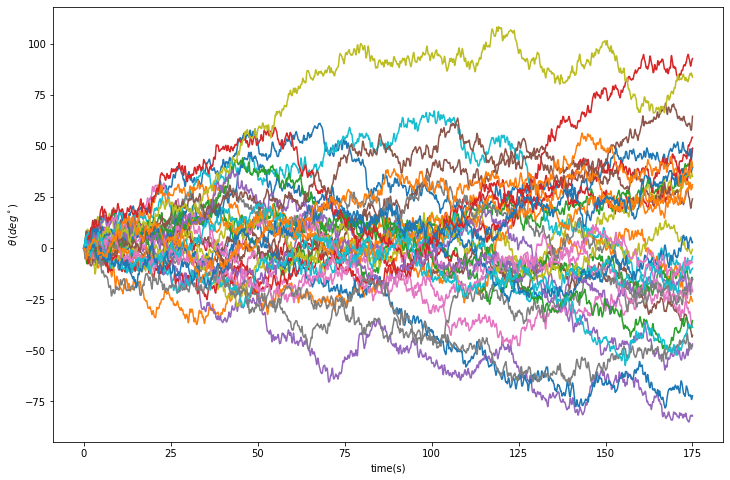

In [12]:
pl.figure(figsize=(12, 8))
pl.plot(tm, u_traces.T);
pl.xlabel('time(s)');
pl.ylabel(r'$\theta\, ({deg}^\circ)$');

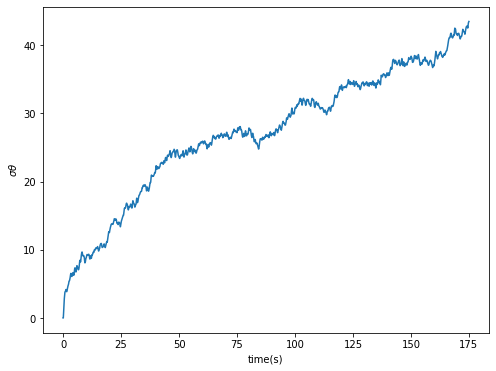

In [13]:
pl.figure(figsize=(8, 6))
pl.plot(tm, np.std(u_traces, axis=0));
pl.xlabel('time(s)'); 
pl.ylabel(r'$\sigma \theta$');

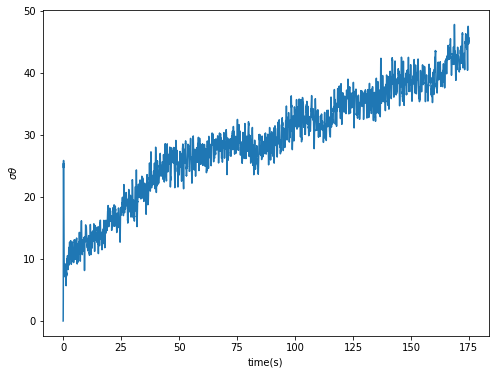

In [14]:
pl.figure(figsize=(8, 6))
pl.plot(tm, np.std(rate_traces, axis=0));
pl.xlabel('time(s)'); 
pl.ylabel(r'$\sigma \theta$');